In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

try:
    df = pd.read_csv('/content/bank (2).csv', sep=';')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

Dataset loaded successfully!

--- First 5 rows of the dataset ---
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

--- Dataset Information ---
<class 'pandas.c

In [5]:
le = LabelEncoder()
df['y_encoded'] = le.fit_transform(df['y'])
print("\n'y' variable encoded into 'y_encoded' (0 for no, 1 for yes).")

categorical_cols = df.select_dtypes(include=['object']).columns.drop(['y'])
print(f"\nCategorical columns to be encoded: {list(categorical_cols)}")

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nCategorical variables have been one-hot encoded.")

print("\n--- First 5 rows of the encoded dataset ---")
print(df_encoded.head())

print(f"\nOriginal shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")

X = df_encoded.drop(['y', 'y_encoded'], axis=1)
y = df_encoded['y_encoded']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


'y' variable encoded into 'y_encoded' (0 for no, 1 for yes).

Categorical columns to be encoded: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Categorical variables have been one-hot encoded.

--- First 5 rows of the encoded dataset ---
   age  balance  day  duration  campaign  pdays  previous   y  y_encoded  \
0   30     1787   19        79         1     -1         0  no          0   
1   33     4789   11       220         1    339         4  no          0   
2   35     1350   16       185         1    330         1  no          0   
3   30     1476    3       199         4     -1         0  no          0   
4   59        0    5       226         1     -1         0  no          0   

   job_blue-collar  ...  month_jul  month_jun  month_mar  month_may  \
0            False  ...      False      False      False      False   
1            False  ...      False      False      False       True   
2            False  ...      False      Fal

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData split into training and testing sets.")
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

print("\nTraining the Decision Tree Classifier...")
dt_classifier.fit(X_train, y_train)
print("Training complete!")

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Decision Tree Classifier: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)
print("\n")

cr = classification_report(y_test, y_pred)
print("--- Classification Report ---")
print(cr)


Data split into training and testing sets.
Training set size: 3616 samples
Testing set size: 905 samples

Training the Decision Tree Classifier...
Training complete!

Accuracy of the Decision Tree Classifier: 0.7580

--- Confusion Matrix ---
[[597 204]
 [ 15  89]]


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       801
           1       0.30      0.86      0.45       104

    accuracy                           0.76       905
   macro avg       0.64      0.80      0.65       905
weighted avg       0.90      0.76      0.80       905



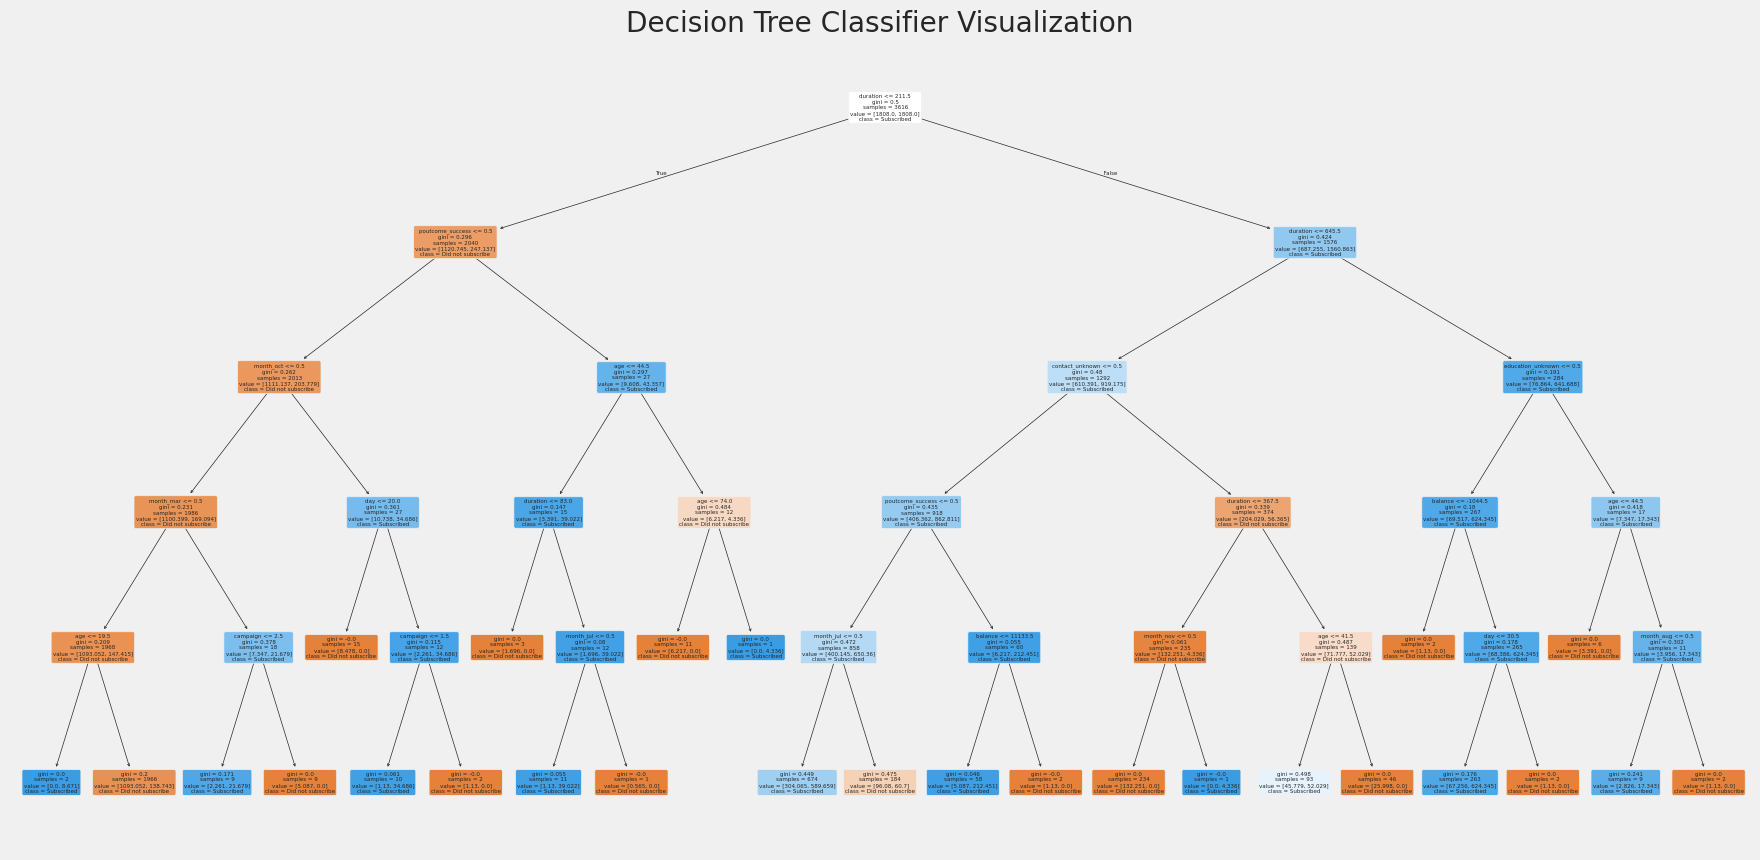


--- Top 10 Most Important Features ---
             feature  importance
3           duration    0.621380
27   contact_unknown    0.103928
40  poutcome_success    0.100611
0                age    0.043186
37         month_oct    0.039045
34         month_mar    0.025062
32         month_jul    0.023386
2                day    0.015676
4           campaign    0.010010
36         month_nov    0.009405


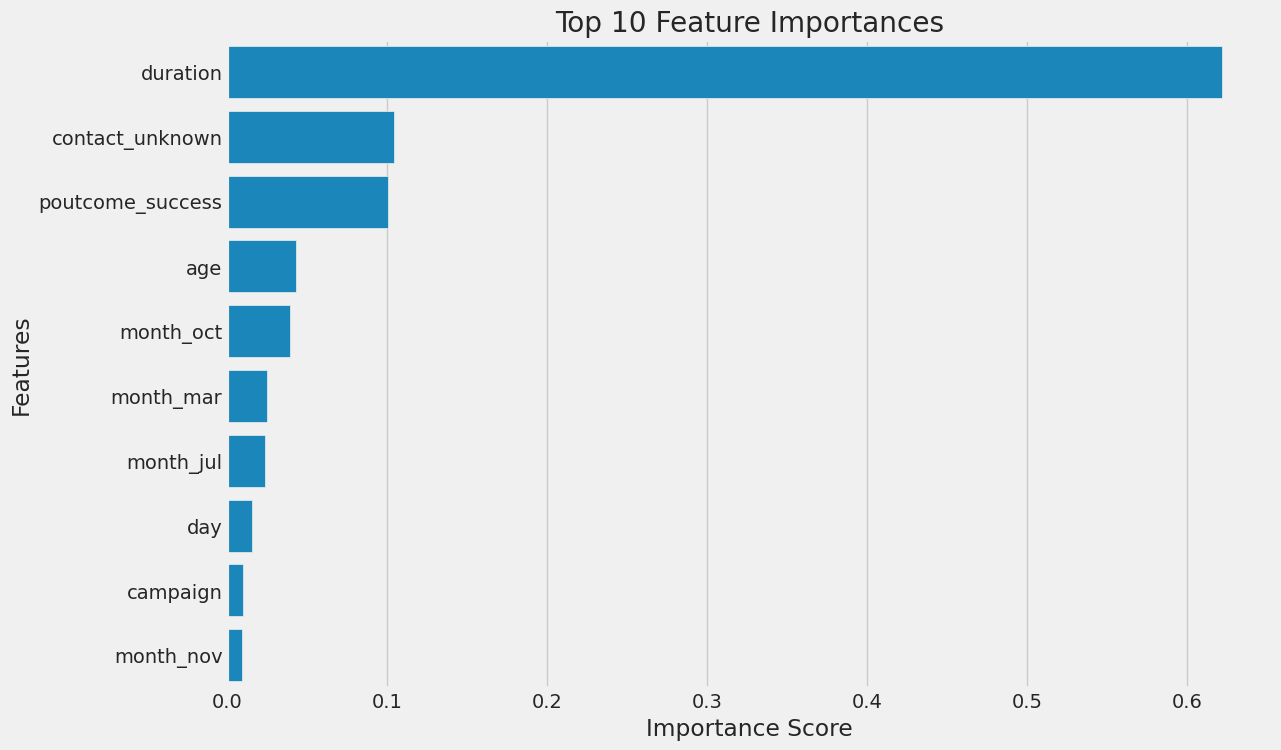

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=['Did not subscribe', 'Subscribed'],
    rounded=True
)
plt.title('Decision Tree Classifier Visualization')
plt.show()

feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': dt_classifier.feature_importances_}
).sort_values(by='importance', ascending=False)

print("\n--- Top 10 Most Important Features ---")
print(feature_importances.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()